In [1]:
import sys
sys.path.append('../')
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import cv2
import random
import numpy as np
from utils import *
from mask_functions import *
%matplotlib inline

#### save masks indices to png format


In [26]:
train_df = pd.read_csv('../data/train.csv')
mask_dir = '../data/npy_masks/'

In [27]:
train_df['ImageId'], train_df['ClassId'] = zip(*train_df['ImageId_ClassId'].str.split('_'))
#train_df['ClassId'] = train_df['ClassId'].astype(int)
#train_df = train_df.pivot(index='ImageId',columns='ClassId',values='EncodedPixels')
#train_df['defects'] = train_df.count(axis=1)

In [28]:
train_df.head()

,ImageId_ClassId,EncodedPixels,ImageId,ClassId
0,0002cc93b.jpg_1,29102 12 29346 24 29602 24 29858 24 30114 24 3...,0002cc93b.jpg,1
1,0002cc93b.jpg_2,NaN,0002cc93b.jpg,2
2,0002cc93b.jpg_3,NaN,0002cc93b.jpg,3
3,0002cc93b.jpg_4,NaN,0002cc93b.jpg,4
4,00031f466.jpg_1,NaN,00031f466.jpg,1


In [5]:
def make_mask(row_id):
    fname = train_df.iloc[row_id].name
    labels = train_df.iloc[row_id][:4]
    masks = np.zeros((256, 1600, 4), dtype=np.uint8)    # 4:class 1～4 (ch:0～3)

    for idx, label in enumerate(labels.values):
        if label is not np.nan:
            label = label.split(" ")
            positions = map(int, label[0::2])
            length = map(int, label[1::2])
            mask = np.zeros(256 * 1600, dtype=np.uint8)
            for pos, le in zip(positions, length):
                mask[pos:(pos + le)] = 255
            masks[:, :, idx] = mask.reshape(256, 1600, order='F')
    return fname, masks

In [16]:
for idx in tqdm(range(len(train_df))):
    image_id, masks = make_mask(idx)
    mask_path = os.path.join(mask_dir, image_id + '.npy')
    np.save(mask_path, masks)

100%|██████████| 12568/12568 [02:54<00:00, 72.06it/s]


In [10]:
np.unique(masks, return_counts=True)

(array([  0, 255], dtype=uint8), array([1634004,    4396]))

In [13]:
masks.shape

(256, 1600, 4)

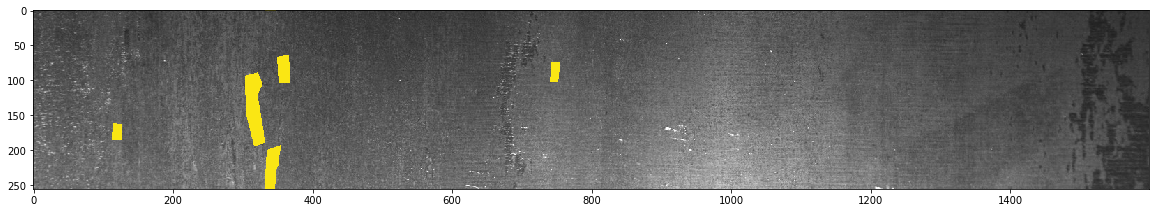

In [15]:
img = cv2.imread('../data/train_images/' + image_id)
palet = [(250, 230, 20), (30, 200, 241), (200, 30, 250), (250,60,20)]
plt.figure(figsize=(20, 10))
for ch in range(4):
    img[masks[:, :, ch] == 255] = palet[ch]
    pass
plt.imshow(img)
plt.show()

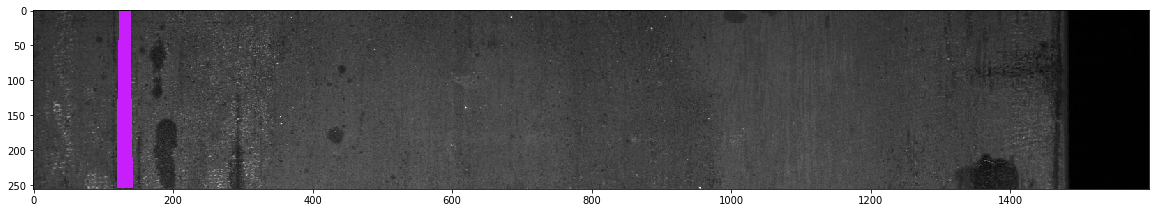

In [19]:
# check after npy files
masks = np.load('../data/npy_masks/' + image_id + '.npy')
img = cv2.imread('../data/train_images/' + image_id)
palet = [(250, 230, 20), (30, 200, 241), (200, 30, 250), (250,60,20)]
plt.figure(figsize=(20, 10))
for ch in range(4):
    img[masks[:, :, ch] == 255] = palet[ch]
    pass
plt.imshow(img)
plt.show()

In [50]:
%time
mask = np.zeros([256, 1600, 4])

CPU times: user 0 ns, sys: 3 µs, total: 3 µs
Wall time: 5.25 µs


In [53]:
%time
new_mask = mask.copy()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.58 µs


### save train images in npy format

In [34]:
# save indices where a mask is 1 as npy file
#train_df = pd.read_csv('../data/train.csv')
img_npy_dir = '../data/npy_train/'
img_dir = '../data/train_images/'
size = 512
gb = train_df.groupby('ImageId')
unique_ids = list(gb.groups.keys())
for image_id in tqdm(unique_ids):
    img_npy_path = os.path.join(img_npy_dir, image_id + '.npy')
    img_path = os.path.join(img_dir, image_id)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    #img = cv2.resize(img, (size, size))
    #img = np.expand_dims(img, -1) # [10]
    np.save(img_npy_path, img)

100%|██████████| 12568/12568 [04:11<00:00, 49.98it/s]


In [32]:
#img[0, 0, :] # all channels have same values, save with one channel (space bachega) and use np.repeat in dataloader.
img.shape

(256, 1600)

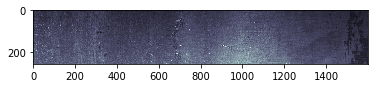

In [33]:
plt.imshow(img, cmap='bone')

In [ ]:

#image_path = os.path.join(self.root, "train_png", image_id + '.png')
#img = cv2.imread(image_path)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img = Image.open(image_path).convert('RGB')
#img = np.asarray(img)

    